Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


FileNotFoundError: [Errno 2] No such file or directory: 'blood.csv'

Load Dataset

In [2]:
df = pd.read_csv("blood.csv")
print("First 5 rows:\n", df.head())
print("\nSummary:\n", df.describe())

First 5 rows:
    Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

Summary:
           Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   99.000000    1.000000


Visualize the Data

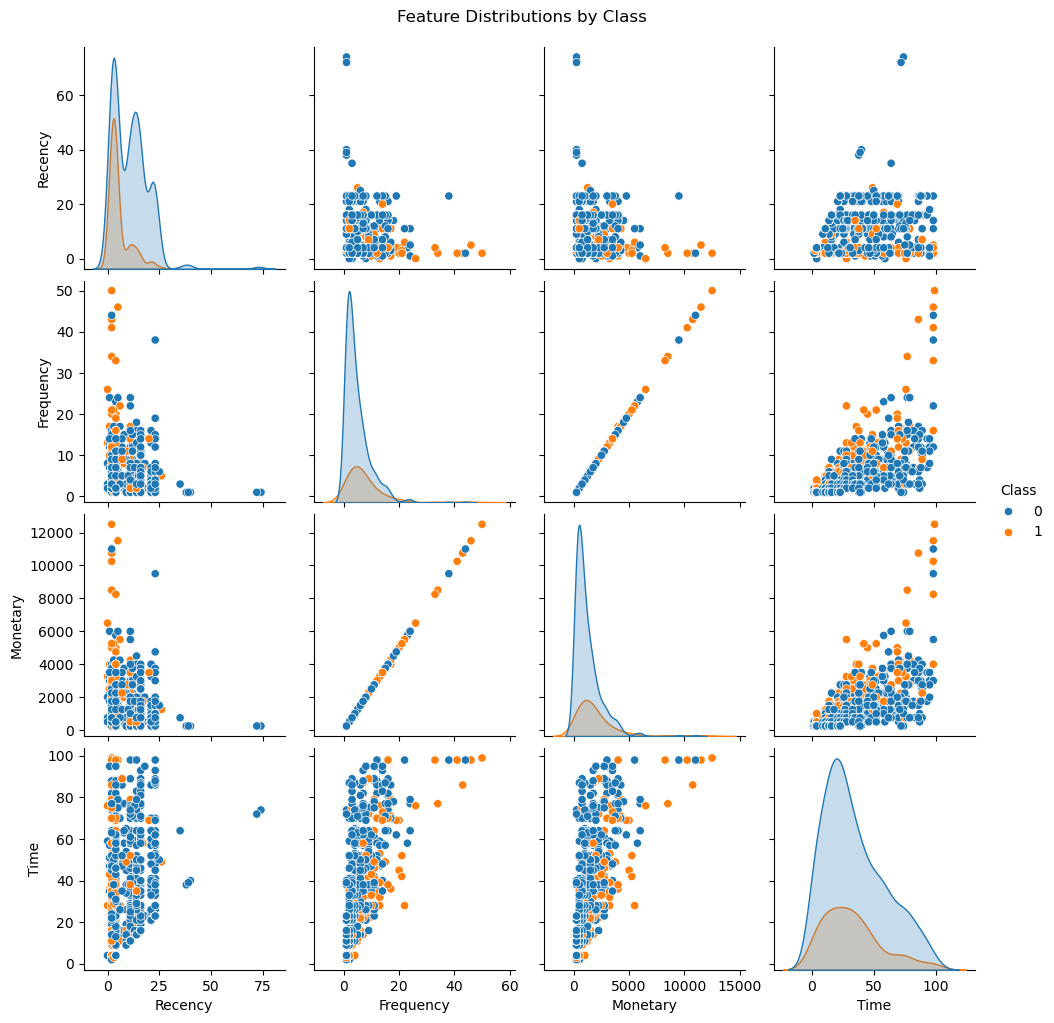

In [3]:
sns.pairplot(df, hue="Class")
plt.suptitle("Feature Distributions by Class", y=1.02)
plt.show()

Class Distribution

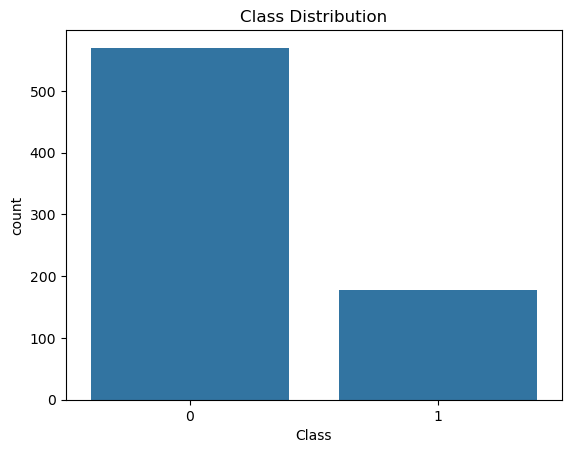

In [4]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution")
plt.show()

Data Preprocessing

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Training

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150


Confusion Matrix:
 [[99 14]
 [28  9]]


ROC Curve

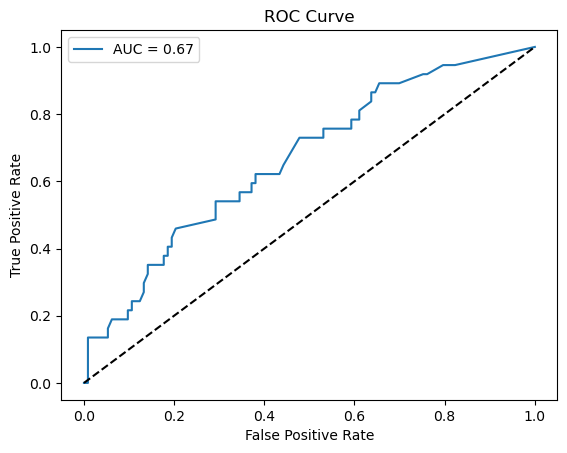

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Simple Recommendation Simulation

In [ ]:
print("🔎 Enter patient data for recommendation:")

recency = int(input("Months since last donation (Recency): "))
frequency = int(input("Total number of donations (Frequency): "))
monetary = int(input("Total blood donated in c.c. (Monetary): "))
time = int(input("Months since first donation (Time): "))

user_input = [[recency, frequency, monetary, time]]
user_input_scaled = scaler.transform(user_input)

recommend = model.predict(user_input_scaled)[0]

print("\n🩸 Personalized Recommendation:")
if recommend == 1:
    print("Encourage donation – high likelihood of future donations.")
else:
    print("Patient may need more engagement or support.")


🔎 Enter patient data for recommendation:

🩸 Personalized Recommendation:
✅ Encourage donation – high likelihood of future donations.


c:\Users\srivi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
